In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

C:\Users\Samue\AppData\Local\Temp\ipykernel_22188\1165524131.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


'c:\\Users\\Samue\\Desktop\\BIOS6644'

In [2]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
admiss_core = pd.read_csv("data/AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("data/AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("data/PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("data/LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [3]:
# 1) 
admiss_core, 
patient_core
labs_core

,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,URINALYSIS: RED BLOOD CELLS,1.8,rbc/hpf,1992-07-01 01:36:17.910
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: GLUCOSE,103.3,mg/dL,1992-06-30 09:35:52.383
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: MCH,35.8,pg,1992-06-30 03:50:11.777
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,METABOLIC: CALCIUM,8.9,mg/dL,1992-06-30 12:09:46.107
1A8791E3-A61C-455A-8DEE-763EB90C9B2C,1,CBC: RED BLOOD CELL COUNT,4.8,m/cumm,1992-07-01 01:31:08.677
...,...,...,...,...,...
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: HEMOGLOBIN,13.6,gm/dl,2012-04-21 03:23:50.883
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,CBC: MCH,26.2,pg,2012-04-21 03:18:44.127
F0B53A2C-98CA-415D-B928-E3FD0E52B22A,6,METABOLIC: CHLORIDE,104.4,mmol/L,2012-04-21 02:58:57.840


In [21]:
# Dates!

In [4]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  

In [5]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [6]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

Timedelta('5 days 10:14:56.766000')

In [7]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
pid='7A025E77-7832-4F53-B9A7-09A3F98AC17E'
admiss_core.loc[admiss_core.index==pid]
#admiss_core


,AdmissionID,AdmissionStartDate,AdmissionEndDate
PatientID,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,2011-10-12 14:55:02.027,2011-10-22 01:16:07.557
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,1978-06-29 07:29:11.593,1978-07-10 04:05:51.787
7A025E77-7832-4F53-B9A7-09A3F98AC17E,2,1982-10-14 07:01:43.613,1982-10-21 16:44:00.310
7A025E77-7832-4F53-B9A7-09A3F98AC17E,3,1990-02-23 04:28:34.457,1990-03-13 15:55:29.837
7A025E77-7832-4F53-B9A7-09A3F98AC17E,4,1994-05-15 11:34:00.840,1994-05-19 23:04:04.877
7A025E77-7832-4F53-B9A7-09A3F98AC17E,5,2001-01-10 11:04:58.943,2001-01-27 00:54:18.730
7A025E77-7832-4F53-B9A7-09A3F98AC17E,6,2001-12-29 20:28:01.050,2002-01-18 18:16:04.423


In [8]:
labs_core.loc[labs_core.index==pid]


,AdmissionID,LabName,LabValue,LabUnits,LabDateTime
PatientID,,,,,
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CARBON DIOXIDE,20.9,mmol/L,1978-06-29 22:56:25.430
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: BILI TOTAL,0.3,mg/dL,1978-06-30 00:55:28.273
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,METABOLIC: CALCIUM,7.4,mg/dL,1978-06-30 07:11:48.760
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: NEUTROPHILS,2.8,k/cumm,1978-06-30 00:01:24.477
7A025E77-7832-4F53-B9A7-09A3F98AC17E,1,CBC: MCHC,32.2,g/dl,1978-06-30 04:33:20.790
...,...,...,...,...,...
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,METABOLIC: ALT/SGPT,65.9,U/L,2011-10-21 22:37:12.087
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: HEMOGLOBIN,11.6,gm/dl,2011-10-22 00:25:12.860
7A025E77-7832-4F53-B9A7-09A3F98AC17E,7,CBC: RDW,14.7,%,2011-10-21 21:29:42.703


In [9]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [10]:
jdf.shape, patient_core.shape, labs_core.shape

((111483, 11), (100, 6), (111483, 5))

In [11]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
print("Stats on Number of Labs per Patient")
print("Mean:", jdf.groupby(by = "PatientID").size().mean())
print("Standard Deviation:", jdf.groupby(by = "PatientID").size().std())

#   2) Compute a list of each lab and how many orders for that lab are in the data frame  

print("Number of each lab:")
print(jdf.groupby("LabName").size())

Stats on Number of Labs per Patient
Mean: 1114.83
Standard Deviation: 539.3615203144914
Number of each lab:
LabName
CBC: ABSOLUTE LYMPHOCYTES        3162
CBC: ABSOLUTE NEUTROPHILS        3210
CBC: BASOPHILS                   3165
CBC: EOSINOPHILS                 3191
CBC: HEMATOCRIT                  3211
CBC: HEMOGLOBIN                  3193
CBC: LYMPHOCYTES                 3162
CBC: MCH                         3191
CBC: MCHC                        3202
CBC: MEAN CORPUSCULAR VOLUME     3175
CBC: MONOCYTES                   3129
CBC: NEUTROPHILS                 3224
CBC: PLATELET COUNT              3177
CBC: RDW                         3188
CBC: RED BLOOD CELL COUNT        3174
CBC: WHITE BLOOD CELL COUNT      3209
METABOLIC: ALBUMIN               3202
METABOLIC: ALK PHOS              3154
METABOLIC: ALT/SGPT              3155
METABOLIC: ANION GAP             3166
METABOLIC: AST/SGOT              3179
METABOLIC: BILI TOTAL            3182
METABOLIC: BUN                   3158
METABOLIC:

Patient with the most labs: 80D356B4-F974-441F-A5F2-F95986D119A2
Most patient/lab combination: ('80D356B4-F974-441F-A5F2-F95986D119A2', 'CBC: HEMATOCRIT')


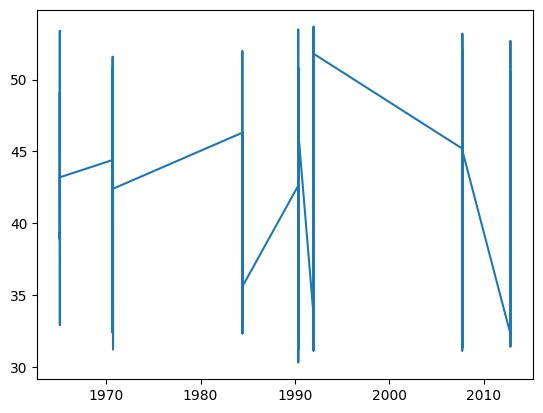

In [12]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken


pt_most_labs = jdf.groupby("PatientID").size().sort_values().index[-1]
pt_most_labs
print(f"Patient with the most labs:", pt_most_labs)

pt_combo = jdf.groupby(['PatientID','LabName']).size().sort_values().index[-1]
print(f"Most patient/lab combination:", pt_combo)

#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns

subdf = jdf.loc[(jdf.index=='80D356B4-F974-441F-A5F2-F95986D119A2') & (jdf.LabName.str.startswith('CBC: HEMATOCRIT'))]

%matplotlib inline
dts = subdf.LabDateTime
vls = subdf.LabValue
plt.figure()
plt.plot(dts, vls)

In [13]:
##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
subdf['LabDateTime'] = pd.to_datetime(subdf['LabDateTime']).dt.date.astype(str) # From https://stackoverflow.com/questions/46452961/how-to-filter-pandas-dataframe-based-on-date-value-with-exact-match
filtered_df = subdf.query("LabDateTime == '1985-08-06'")
print(filtered_df)

"""Looking solely at the plot, we cannot determine what the lab value, if any, is on August 6, 1985. However, by querying
The data for lab dates that are 1985-08-06, we can see that there are no lab values for that date.

We can confirm that this code works by using a known date, such as the first lab value date, 1965-01-31"""

filtered_df = subdf.query("LabDateTime == '1965-01-31'")
print(filtered_df)

"""As we can see, the known date shows a CBC: Hematocrit value of 39.3"""

# 2) How about the value for December 14, 1991?
filtered_df2 = subdf.query("LabDateTime == '1991-12-14'")
print(filtered_df2)
"""Using just the plot, we would have to guess that the lab value for
this date is somewhere between ~31 and ~56. However, using the same method as before, 
we see that there are no lab values for December 14, 1991"""

Empty DataFrame
Columns: [PatientGender, PatientDateOfBirth, PatientRace, PatientMaritalStatus, PatientLanguage, PatientPopulationPercentageBelowPoverty, AdmissionID, LabName, LabValue, LabUnits, LabDateTime]
Index: []
                                     PatientGender      PatientDateOfBirth  \
PatientID                                                                    
80D356B4-F974-441F-A5F2-F95986D119A2        Female 1938-03-06 18:24:18.297   

                                     PatientRace PatientMaritalStatus  \
PatientID                                                               
80D356B4-F974-441F-A5F2-F95986D119A2       White               Single   

                                     PatientLanguage  \
PatientID                                              
80D356B4-F974-441F-A5F2-F95986D119A2         English   

                                      PatientPopulationPercentageBelowPoverty  \
PatientID                                                                   

C:\Users\Samue\AppData\Local\Temp\ipykernel_22188\3181917929.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf['LabDateTime'] = pd.to_datetime(subdf['LabDateTime']).dt.date.astype(str) # From https://stackoverflow.com/questions/46452961/how-to-filter-pandas-dataframe-based-on-date-value-with-exact-match


'Using just the plot, we would have to guess that the lab value for\nthis date is somewhere between ~31 and ~56. However, using the same method as before, \nwe see that there are no lab values for December 14, 1991'